In [76]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
# Create the paths to the images and masks
# Files not included because of the size but can be downloaded here:
# http://www.josiahwang.com/dataset/leedsbutterfly/
imagePath = './leedsbutterfly/images'
maskPath = './leedsbutterfly/segmentations'

In [78]:
# Image size and if it should be RGB or Gray-scale
size = 69
RGB = True

# Handles segmentation of the butterflies based on the mask
def segmentation(imagePath, maskPath):
    numImage = len(os.listdir(imagePath))
    numMask = len(os.listdir(maskPath))
    
    # Check if there is a mask for all the pictures
    if numImage != numMask:
        pass
        print('Not correct number')
    
    segmentationArray = []
    for index in range(numImage):
        if RGB == True:
            image = cv2.imread(os.path.join(imagePath,os.listdir(imagePath)[index]))
        else:
            image = cv2.imread(os.path.join(imagePath,os.listdir(imagePath)[index]), 0)
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(size,size))
        
        maskG = cv2.imread(os.path.join(maskPath,os.listdir(maskPath)[index]))
        maskG = cv2.cvtColor(maskG,cv2.COLOR_BGR2RGB)
        maskG = cv2.resize(maskG,(size,size))
        
        # Applies the mask to the image
        res = cv2.bitwise_and(image, image, mask = maskG[:,:,2])
        
        segmentationArray.append(res)
        
    return segmentationArray

# Makes one figure able to display multiple pictures
def display_multiple(images, titles, number = 1, rows = 1, cols=1):
    fig = plt.figure(figsize=(10, 10))
    for i in range(number):
        fig.add_subplot(rows, cols, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(titles[i])

In [79]:
# All the butterfly-types in the dataset
types = ['Danaus plexippus',
         'Heliconius charitonius',
         'Heliconius erato',
         'Junonia coenia',
         'Lycaena phlaeas',
         'Nymphalis antiopa',
         'Papilio cresphontes',
         'Pieris rapae',
         'Vanessa atalanta',
         'Vanessa cardui']

# Generate the type based on the nubmber on the file name
typeArray = []
for name in os.listdir(imagePath):
    nameIndex = int(name[:3])
    typeArray.append(types[nameIndex - 1])

In [80]:
result = segmentation(imagePath, maskPath)

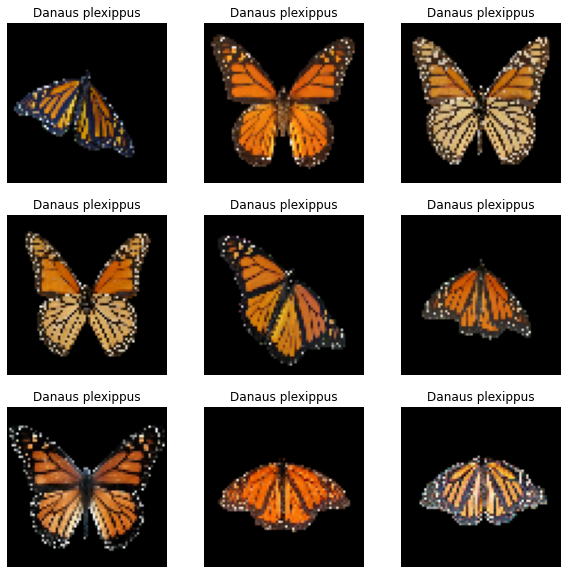

In [81]:
display_multiple(result, typeArray, 9, 3, 3)

In [82]:
# Generate filename String
savePath = './Data/'

color = ''
if RGB == True:
    color = 'RGB'
else:
    color = 'Gray'

dimension = str(size) + 'x' + str(size)
    
xPath = savePath + color + dimension + 'InputImage'
yPath = savePath + color + dimension + 'OutputType'

# Save the arrays as .npy files so that it can be easily loaded
np.save(os.path.join(xPath), np.array(result))
np.save(os.path.join(yPath), np.array(typeArray))